<a href="https://colab.research.google.com/github/Varshachintalapudi/OIBSIP/blob/main/house_sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/house price detection/Housing.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
# Identify numerical and categorical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Fill missing values for numerical columns with the median
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].median())

# Fill missing values for categorical columns with the most frequent value (mode)
data[categorical_columns] = data[categorical_columns].fillna(data[categorical_columns].mode().iloc[0])

# Check for any remaining missing values
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])



Series([], dtype: int64)


In [ ]:
# Select relevant features for the model
# Assuming 'price' is the target variable and others are features
features = data.columns.drop('price')
X = data[features]
y = data['price']


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Separate numerical and categorical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = data.select_dtypes(include=['object']).columns

# One-hot encode categorical columns
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Define the features and target variable
features = data_encoded.columns.drop('price')
X = data_encoded[features]
y = data_encoded['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 1754318687330.6638
R-squared: 0.6529242642153184


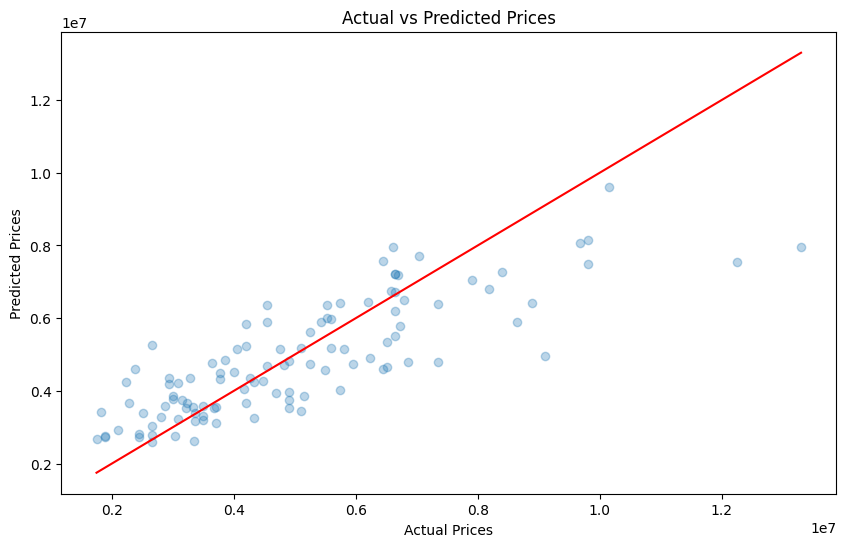

In [ ]:
import matplotlib.pyplot as plt

# Plot the relationship between actual and predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.show()
